In [1]:
import sys
import os
sys.path.append('..')
sys.path.append('../..')

In [2]:
import NGTS

In [3]:
from NGTS.NGTS_Field import return_field_from_object_directory

In [4]:
field = return_field_from_object_directory('.', 'NG0004-2950')

2895
10348
13417
12025
12524
14186
17424
4735
16170
20343
11700
11156
5249
8989
12008
17146
15279
3591
8477
9992
13896
11998
10702
6897
7314
10537
10931
5862
2442
13071
7039
15987
13588
1283
13570
10781
12097
15264
16491
9825
16794
3723
14429
10598
13575
13788
9188
5363
7670
6292
9539
9443
12169
13642
7217
10029
11550
9739
14707
14065
12489
8670
12559
8947
15618
6610
12744
11982
12758
8811
12168
11679
8116
10182
4702
8993
7490
11233
11963
12641
12180
13005
9731
15321
12255
12648
12805
3201
11045
11126
18207
4846
6001
4258
10890
10446
15926
13704
10520
8749
16885
10725
7654
13652
8751
12962
11843
5076
12886
12254
8007
7919
13463
11417
13587
8061
10246
15008
12702
7061
626
12602
9063
6955
11872
8299
10020
10973
6835
9986
6650
11974
13302
6461
12034
12849
7757
14826
12231
13299
13180
12456
3284
6761
17980
6655
3450
11209
13403
15588
10727
12783
6051
7182
10645
16461
12687
13678
9249
10294
10659
15270
6278
14738
1221
4124
13480
14442
9681
18932
matched 170 of 171 files


In [5]:
field.num_objects

170

In [7]:
obj = field[626]

In [8]:
obj

NGTS Object NG0004-2950_626 (CYCLE1802)

In [9]:
dir(obj)

['__class__',
 '__delattr__',
 '__dict__',
 '__doc__',
 '__eq__',
 '__format__',
 '__getattribute__',
 '__hash__',
 '__init__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 u'alpha',
 'bin_data',
 'calculate_autocorrelation',
 'calculate_noise_threshold',
 'calculate_periods_from_autocorrelation',
 u'correlations',
 'create_logger',
 u'do_relflux',
 u'field',
 u'filename',
 u'flux',
 u'flux_binned',
 u'flux_binned_err',
 u'flux_binned_std_dev',
 u'flux_std_dev',
 u'ft',
 u'gen_autocol_dict',
 u'gen_data_dict',
 u'gen_ft_dict',
 'get_binned_data',
 'get_data',
 'get_data_from_dict',
 u'lag_resolution',
 u'lag_timeseries',
 u'lc_data2get',
 'log_peaks',
 u'logger',
 u'max_lag',
 u'median_flux',
 u'median_flux_binned',
 u'nsig2keep',
 u'num_observations',
 u'num_observations_binned',
 u'obj',
 'object_to_json',
 u'ok',
 u'peak_indexes',
 u'peak_percentages',
 u'peak_sign

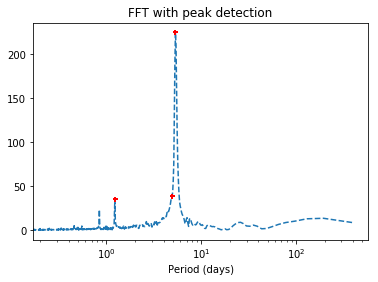

In [10]:
obj.plot_ft(interactive=True)

In [17]:
print obj.peak_indexes
print obj.ft[obj.peak_indexes]
print obj.periods

[ 73  80 318]
[224.83048751  39.32072947  35.19861728]
[5.33854559 4.87142285 1.22551518]


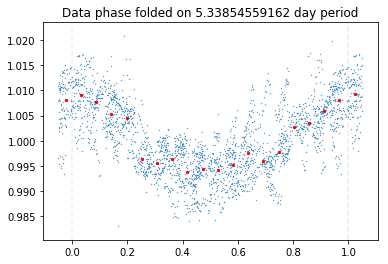

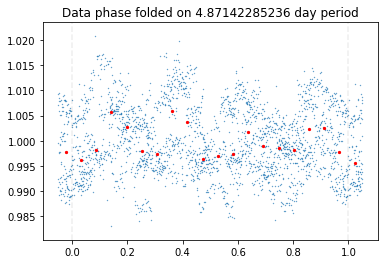

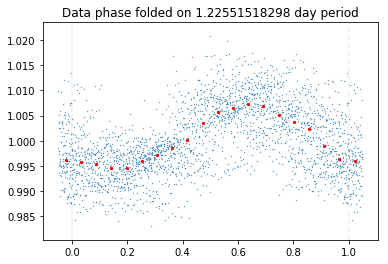

In [15]:
obj.plot_phase_folded_lcs(interactive=True)

In [18]:
periods = [obj.periods[0] for obj in field]

In [19]:
import matplotlib.pyplot as plt

In [23]:
field.object_list = [int(obj.obj) for obj in field]
field.object_list[:5]

[9731, 12805, 10246, 3591, 9739]

In [26]:
from ngtsio import ngtsio

In [40]:
data = ngtsio.get(fieldname=field.fieldname, ngts_version=field.test, obj_id = field.object_list, 
                  keys=['OBJ_ID', 'VMAG', 'KMAG', 'MAG_MEAN'])
data['V-K'] = [v - k for v, k in zip(data['VMAG'], data['KMAG'])]

('Field name:', 'NG0004-2950')
('NGTS version:', 'CYCLE1802')
('Object IDs (', 170, '):', array(['000626', '001221', '001283', '002442', '002895', '003201',
       '003284', '003450', '003591', '003723', '004124', '004258',
       '004702', '004735', '004846', '005076', '005249', '005363',
       '005862', '006001', '006051', '006278', '006292', '006461',
       '006610', '006650', '006655', '006761', '006835', '006897',
       '006955', '007039', '007061', '007182', '007217', '007314',
       '007490', '007654', '007670', '007757', '007919', '008007',
       '008061', '008116', '008299', '008477', '008670', '008749',
       '008751', '008811', '008947', '008989', '008993', '009063',
       '009188', '009249', '009443', '009539', '009681', '009731',
       '009739', '009825', '009986', '009992', '010020', '010029',
       '010182', '010246', '010294', '010348', '010446', '010520',
       '010537', '010598', '010645', '010659', '010702', '010725',
       '010727', '010781', '010890', '0

In [41]:
for i, obj_id in enumerate(data['OBJ_ID']):
    field[int(obj_id)].MAG = data['MAG_MEAN'][i]

In [50]:
periods = [obj.periods[0] for obj in field]
mags = [obj.MAG for obj in field]

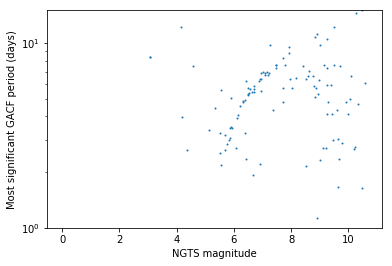

In [90]:
plt.scatter(mags,periods,s=1)
ax = plt.gca()
plt.ylabel('Most significant GACF period (days)')
plt.xlabel('NGTS magnitude')
plt.ylim((1,15))
ax.set_yscale("log")
plt.show()

(array([ 3., 10., 15.,  9., 11., 17., 13., 11., 10.,  3.,  2.,  2.,  2.,
         1.,  2.,  0.,  0.,  1.,  1.,  0.,  2.,  0.,  1.,  0.,  1.,  1.,
         0.,  0.,  1.,  0.,  1.,  0.,  0.,  0., 29.,  0.,  0.,  6.,  0.,
         0.,  2.,  0.,  1.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  4.,  2.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([ 1.12960252,  1.89773319,  2.66586385,  3.43399452,  4.20212519,
         4.97025586,  5.73838653,  6.50651719,  7.27464786,  8.04277853,
         8.8109092 ,  9.57903987, 10.34717053, 11.1153012 , 11.88343187,
        12.65156254, 13.41969321, 14.18782387, 14.95595454, 15.72408521,
        16.49221588, 17.26034655, 18.02847721, 18.79660788, 19.56473855,
        20.33286922, 21.10099989, 21.86913055, 22.63726122, 23.405391

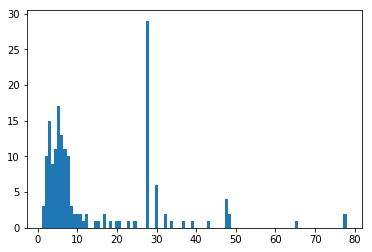

In [77]:
plt.hist(periods, bins=100)

In [67]:
from collections import Counter
c = Counter(periods)
c.most_common(5)

[(27.83662831232471, 3),
 (27.836627520694773, 2),
 (27.836630828998995, 2),
 (27.83663162062894, 2),
 (29.977912987695458, 1)]

In [71]:
common_periods = {}
for obj in field:
    period = obj.periods[0]
    if period in common_periods.keys():
        common_periods[period].append(obj.obj)
    else:
        common_periods[period] = [obj.obj]
common_periods = {k:v for k, v in common_periods.iteritems() if len(v) > 1}
common_periods

{27.836627520694773: [13180, 6051],
 27.83662831232471: [10645, 10598, 12648],
 27.836630828998995: [10348, 12524],
 27.83663162062894: [12034, 11233]}

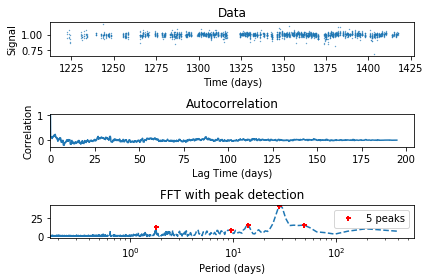

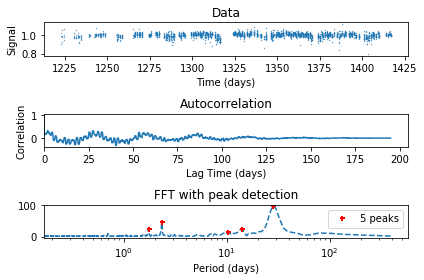

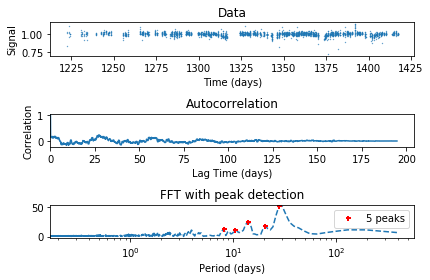

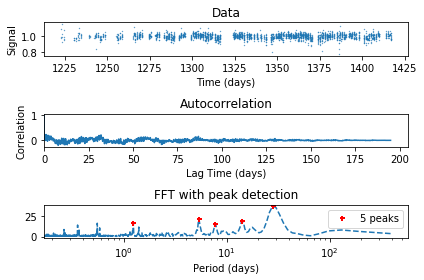

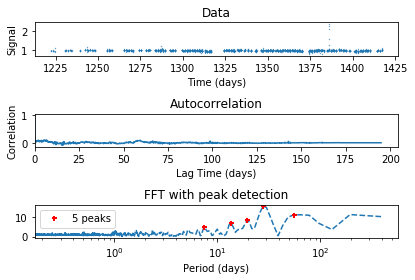

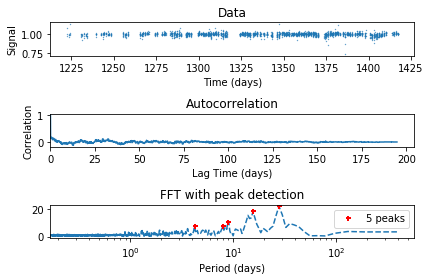

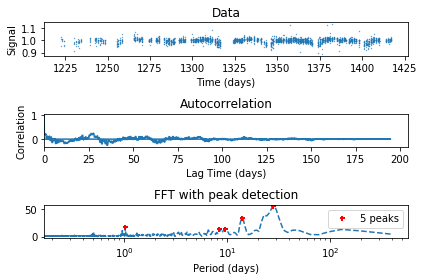

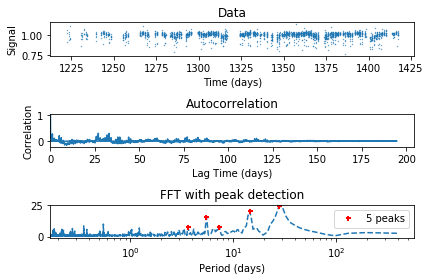

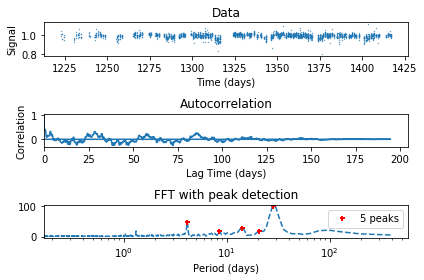

In [74]:
for objs in common_periods.values():
    for obj in objs:
        field[obj].plot_data_autocol_ft(interactive=True)

In [75]:
num_periods = [len(obj.periods) for obj in field]
c2 = Counter(num_periods)
c2.most_common(20)

[(5, 128), (3, 15), (2, 13), (4, 13), (1, 1)]